In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [369]:
df = pd.read_csv('loan.csv',low_memory=False)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [371]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [372]:
df.shape

(39717, 111)

# Several columns have only NA values
### Dropping these columns is the only option

In [373]:
df.isna().sum().sort_values(ascending=False)[:60]

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [374]:
df.dropna(axis=1,how='all',inplace=True)

In [375]:
df.shape

(39717, 57)

# Dropping loan behaviour columns that will not be avilable at the time of decision

In [376]:
lb_cols = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']



In [377]:
df.drop(lb_cols,axis=1,inplace=True)

In [378]:
df.shape

(39717, 36)

# Dropping observations where loan status is Current, as we do not know how those loans will play out

In [379]:
df = df[df.loan_status!='Current']

In [380]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

next_pymnt_d                  1.000000
mths_since_last_record        0.928973
mths_since_last_delinq        0.645592
desc                          0.324727
emp_title                     0.061850
emp_length                    0.026778
pub_rec_bankruptcies          0.018068
chargeoff_within_12_mths      0.001452
collections_12_mths_ex_med    0.001452
tax_liens                     0.001011
title                         0.000285
dti                           0.000000
zip_code                      0.000000
addr_state                    0.000000
initial_list_status           0.000000
policy_code                   0.000000
acc_now_delinq                0.000000
delinq_amnt                   0.000000
purpose                       0.000000
id                            0.000000
member_id                     0.000000
pymnt_plan                    0.000000
loan_status                   0.000000
issue_d                       0.000000
verification_status           0.000000
annual_inc               

# Dropping columns with too many N/A values

In [381]:
df.drop(['next_pymnt_d','mths_since_last_record'],axis=1,inplace=True)

# Dropping columns with only 1 unique value - these cannot be analysed as there is no variation

In [385]:
df.nunique().sort_values()

loan_status                   2
term                          2
pub_rec_bankruptcies          3
verification_status           3
home_ownership                5
grade                         7
emp_length                   11
purpose                      14
sub_grade                    35
addr_state                   50
issue_d                      55
mths_since_last_delinq       95
int_rate                    370
zip_code                    822
loan_amnt                   870
funded_amnt                1019
dti                        2853
annual_inc                 5215
funded_amnt_inv            8050
installment               15022
title                     19297
desc                      25803
emp_title                 28027
member_id                 38577
url                       38577
id                        38577
dtype: int64

In [386]:
num_unique_vals = df.nunique().sort_values()
single_val_cols = list(num_unique_vals[num_unique_vals==1].keys())
df.drop(single_val_cols,axis=1,inplace=True)

In [387]:
df.shape

(38577, 26)

# Dropping id columns and columns that are too granular for analysis

In [388]:
id_cols = ['id','member_id','url','zip_code','desc','emp_title','title']
df.drop(id_cols,axis=1,inplace=True)

In [389]:
df.shape

(38577, 19)

In [390]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'mths_since_last_delinq',
       'pub_rec_bankruptcies'],
      dtype='object')

In [391]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [392]:
# converting loan status into one-hot encoding for easier analysis
df['charged_off'] = np.where(df.loan_status=='Charged Off',1,0)

In [393]:
df.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
mths_since_last_delinq    float64
pub_rec_bankruptcies      float64
charged_off                 int64
dtype: object

# Cleaning data 

In [394]:
df.term = df.term.str.replace(' months','').astype(int)

In [395]:
df.int_rate = df.int_rate.str.replace('%','').astype(float)

## Extracting month and year from issue date

In [396]:
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%y')

In [397]:
df['issue_yr'] = df.issue_d.apply(lambda x: x.year)

In [398]:
df['issue_mth'] = df.issue_d.apply(lambda x: x.month)

In [399]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

mths_since_last_delinq    0.645592
emp_length                0.026778
pub_rec_bankruptcies      0.018068
loan_amnt                 0.000000
issue_d                   0.000000
issue_yr                  0.000000
charged_off               0.000000
dti                       0.000000
addr_state                0.000000
purpose                   0.000000
loan_status               0.000000
verification_status       0.000000
funded_amnt               0.000000
annual_inc                0.000000
home_ownership            0.000000
sub_grade                 0.000000
grade                     0.000000
installment               0.000000
int_rate                  0.000000
term                      0.000000
funded_amnt_inv           0.000000
issue_mth                 0.000000
dtype: float64

# Univariate

In [400]:
percentiles=[.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99]

In [401]:
# There are no massive outleirs in the dataset that require treatment

df.describe(percentiles=percentiles)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,mths_since_last_delinq,pub_rec_bankruptcies,charged_off,issue_yr,issue_mth
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,37880.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,13.272727,35.882534,0.043479,0.145864,2010.309070,7.114757
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,6.673044,22.028093,0.204583,0.352975,0.882658,3.408523
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2007.000000,1.000000
1%,1200.000000,1200.000000,671.616919,36.000000,5.420000,37.513600,1.440000e+04,0.350000,0.000000,0.000000,0.000000,2008.000000,1.000000
5%,2400.000000,2400.000000,1800.000000,36.000000,6.170000,70.610000,2.400000e+04,2.100000,3.000000,0.000000,0.000000,2009.000000,1.000000
10%,3090.000000,3000.000000,2825.000000,36.000000,7.140000,98.990000,3.000000e+04,4.060000,7.100000,0.000000,0.000000,2009.000000,2.000000
20%,5000.000000,5000.000000,4375.000000,36.000000,7.900000,149.922000,3.719616e+04,6.910000,15.000000,0.000000,0.000000,2010.000000,4.000000
30%,6000.000000,6000.000000,5600.000000,36.000000,9.990000,186.060000,4.450000e+04,9.240000,21.000000,0.000000,0.000000,2010.000000,5.000000
40%,7750.000000,7500.000000,7000.000000,36.000000,10.990000,228.710000,5.000400e+04,11.350000,27.000000,0.000000,0.000000,2010.000000,6.000000


In [402]:
# Annual income will be easier to analyse on log scale, as it makes more sense 
## Income ratios are more meaningful than absolute differences
## 10k vs 20k is a bigger difference than 1L vs 1.1L
## Distribution will also be more normal

df['log_anninc']=df.annual_inc.apply(lambda x: math.log(x))

In [403]:
# Safe to assume that N/A values in case of public record bankruptcies indicates absence of any records
## Replace with zeros

df.pub_rec_bankruptcies.fillna(0,inplace=True)

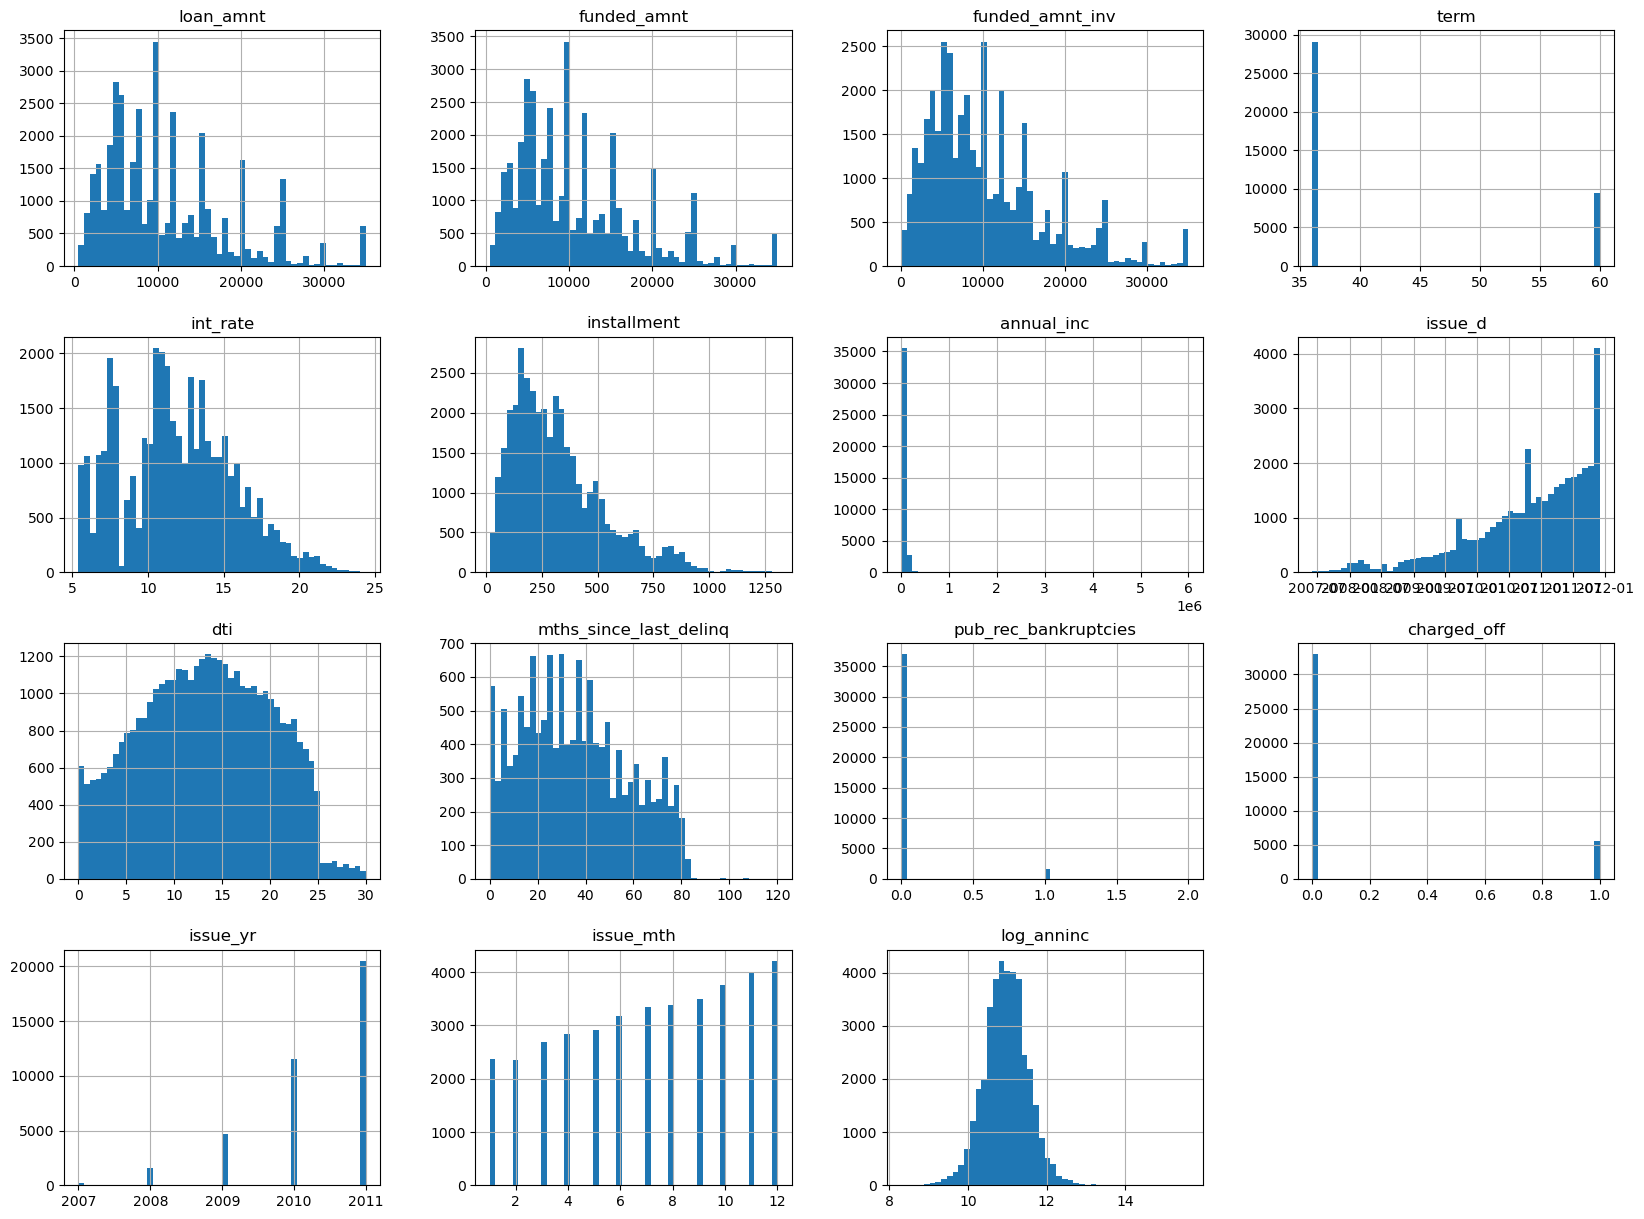

In [404]:
# Loan amounts have spikes at certain numbers e.g. 1000,2000,5000 which makes sense (round numbers)
# Most loans data is from 2011
# DTI has a sharp drop off after 25
# Month data seems to indicate than more loans are given later in the year, 
## But that may be due to more loan data being collected towards the end of our time window 

df.hist(bins=50, figsize=(20,15))
plt.show()

In [405]:
# Sanity checks - checks to ensure there are no illogical entries 
## e.g. loan amount requested should never be higher then the funded amount

print((df.loan_amnt<df.funded_amnt).sum())
print((df.funded_amnt<df.funded_amnt_inv).sum())
print((df.funded_amnt<df.installment).sum())

0
0
0


In [406]:
# Most loans fall within Grade A-D

df.grade.value_counts(normalize=True)

B    0.302641
A    0.260388
C    0.203074
D    0.131814
E    0.069031
F    0.025300
G    0.007751
Name: grade, dtype: float64

In [407]:
# Rent, Mortgage and Own account for most of home ownership

df.home_ownership.value_counts(normalize=True)

RENT        0.479042
MORTGAGE    0.441221
OWN         0.077118
OTHER       0.002540
NONE        0.000078
Name: home_ownership, dtype: float64

In [408]:
df.verification_status.value_counts(normalize=True)

Not Verified       0.432745
Verified           0.316406
Source Verified    0.250849
Name: verification_status, dtype: float64

In [409]:
df.emp_length.value_counts(normalize=True)

10+ years    0.226081
< 1 year     0.120072
2 years      0.114293
3 years      0.106861
4 years      0.089016
5 years      0.085074
1 year       0.084408
6 years      0.057746
7 years      0.045573
8 years      0.038222
9 years      0.032655
Name: emp_length, dtype: float64

In [410]:
# Default rate across population is 14.5%
df.loan_status.value_counts(normalize=True)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

In [411]:
# ratio of amount requested to amount funded (by lending club & investors) can be a useful metric to evaluate

df['funded_to_loan_amt']=df.funded_amnt/df.loan_amnt
df['funded_inv_to_loan_amt']=df.funded_amnt_inv/df.loan_amnt

In [412]:
df[['funded_to_loan_amt','funded_inv_to_loan_amt']].describe(percentiles=percentiles)

,funded_to_loan_amt,funded_inv_to_loan_amt
count,38577.000000,38577.000000
mean,0.985954,0.937877
std,0.069594,0.173311
min,0.101250,0.000000
1%,0.625000,0.085931
5%,1.000000,0.585816
10%,1.000000,0.812310
20%,1.000000,0.970702
30%,1.000000,0.989583
40%,1.000000,0.996429


In [413]:
# Converting this into a binary flag as most of the values are 1, so there is little value is analysing the distribution

df['low_funding_ratio'] = np.where(df.funded_inv_to_loan_amt<.8,1,0)

In [414]:
df.low_funding_ratio.value_counts(normalize=True)

0    0.901962
1    0.098038
Name: low_funding_ratio, dtype: float64

# Bivariate & Multivariate - identifying variables that predict high default rates 

### Loan grade is a strong predictor of default rates


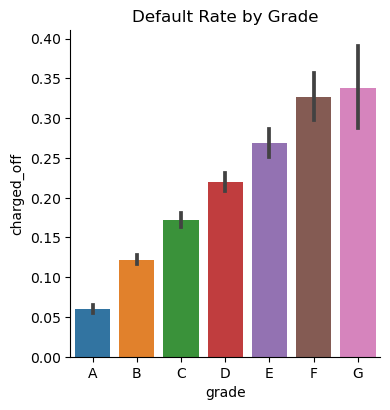

In [415]:
gradeorder = df.grade.unique()
gradeorder.sort()

g = sns.catplot(data=df,x='grade',y='charged_off',kind='bar',order=gradeorder,height=4,aspect=1)
g.set(title='Default Rate by Grade')
g.savefig('grade.png')
plt.show()

In [416]:
# Bucket into High vs Low for easier analysis

def assign_grade_bucket(x):
    if x in ['D','E','F','G']:
        return 'Bad'
    elif x in ['A','B','C']:
        return 'Good'

In [417]:
df['grade_bucket']=df.grade.apply(assign_grade_bucket)

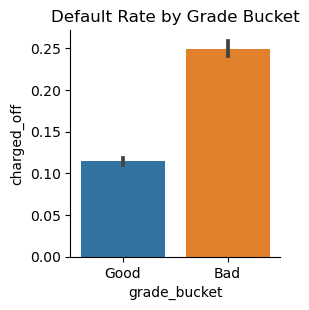

In [418]:
g = sns.catplot(data=df,x='grade_bucket',y='charged_off',kind='bar',height=3,aspect=1)
g.set(title='Default Rate by Grade Bucket')
plt.show()

### It makes sense to control for Grade bucket when analysing other variables
#### Longer term loans seem to have much higher default rates
#### Even a good grade loan with 60 month term has higher default rate than a bad grade loan with 36 month term

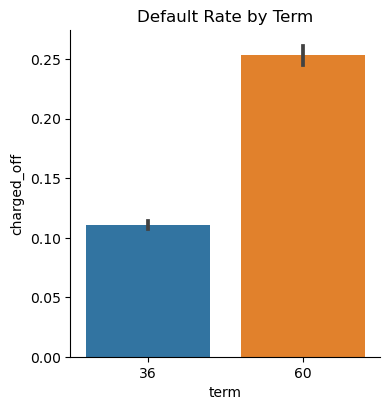

In [419]:
g = sns.catplot(data=df,x='term',y='charged_off',kind='bar',height=4,aspect=1)
g.set(title='Default Rate by Term')
g.savefig('term.png')
plt.show()

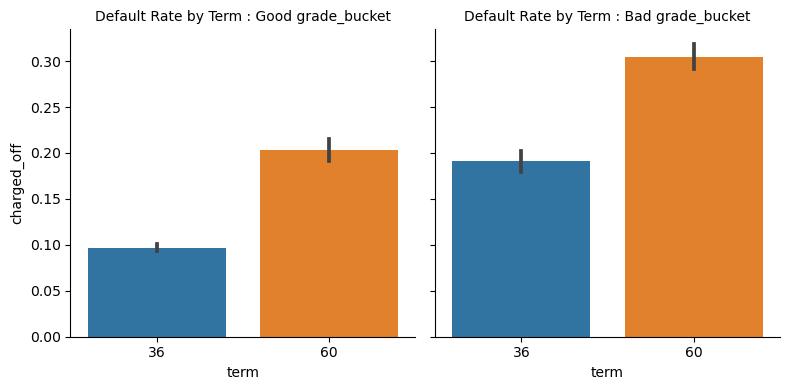

In [420]:
g = sns.catplot(data=df,x='term',y='charged_off',kind='bar',col='grade_bucket',height=4,aspect=1)
g.set_titles('Default Rate by Term : {col_name} {col_var}')
g.savefig('term_grade.png')
plt.show()

### Funding ratio is also a predictor of default, but not as strong once we control for term and loan grade

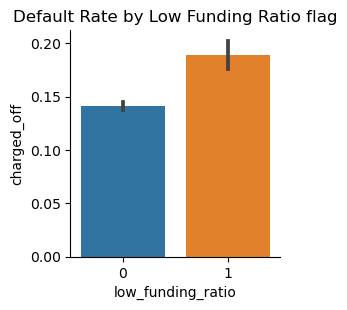

In [421]:
g = sns.catplot(data=df,x='low_funding_ratio',y='charged_off',kind='bar',height=3,aspect=1)
g.set(title='Default Rate by Low Funding Ratio flag')
g.savefig('fr.png')
plt.show()

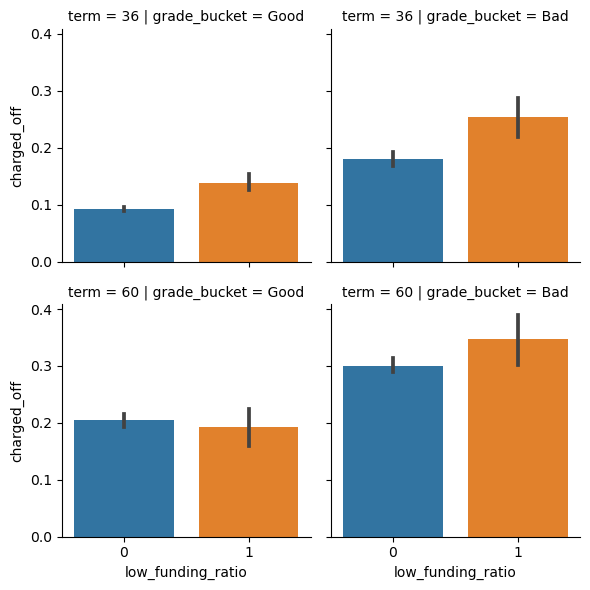

In [422]:
g = sns.catplot(data=df,x='low_funding_ratio',y='charged_off',kind='bar',row='term',col='grade_bucket',height=3,aspect=1)
g.savefig('fr_facet.png')
plt.show()

### Verified status seems to have the highest default rate, which is counter-intuitive


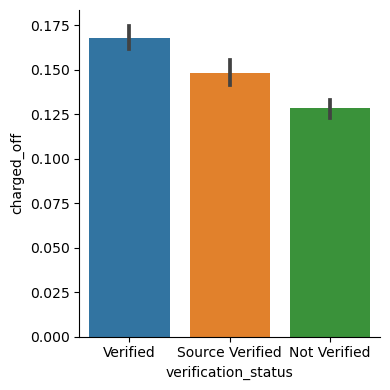

In [423]:

g = sns.catplot(data=df,x='verification_status',y='charged_off',kind='bar',height=4,aspect=1)
plt.show()

### When we control for term and grade bucket, we see no consistent pattern


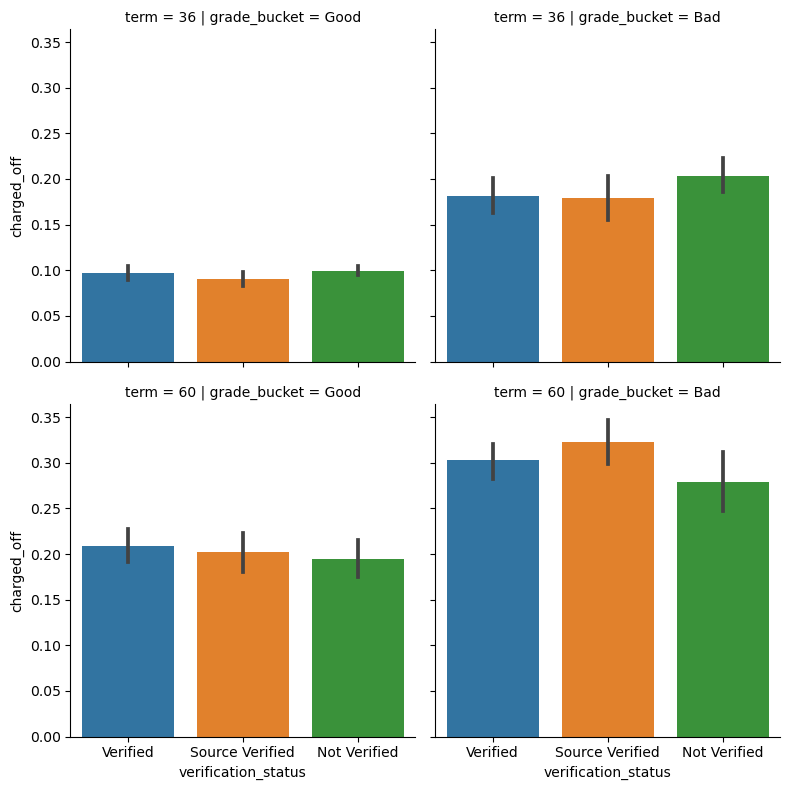

In [424]:

g = sns.catplot(data=df,x='verification_status',y='charged_off',kind='bar',row='term',col='grade_bucket',height=4,aspect=1)
plt.show()

### Having public record bankruptcies seems to be a strong indicator of defaults

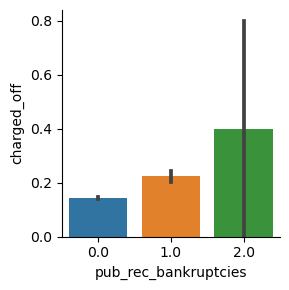

In [425]:
g = sns.catplot(data=df,x='pub_rec_bankruptcies',y='charged_off',kind='bar',height=3,aspect=1)
plt.show()

In [426]:
# Converting into a binary flag since there are very few cases of 2 public bankruptcies
df['has_pub_rec_bankruptcies'] = np.where(df.pub_rec_bankruptcies>0,1,0)

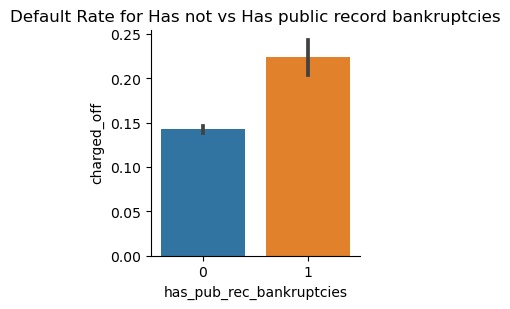

In [427]:
g = sns.catplot(data=df,x='has_pub_rec_bankruptcies',y='charged_off',kind='bar',height=3,aspect=1)
g.set(title='Default Rate for Has not vs Has public record bankruptcies')
g.savefig('pub_rec.png')
plt.show()

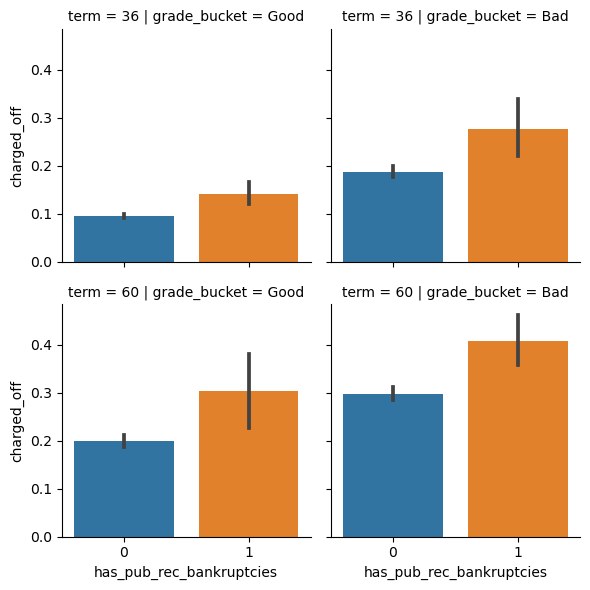

In [428]:
g = sns.catplot(data=df,x='has_pub_rec_bankruptcies',y='charged_off',kind='bar',row='term',col='grade_bucket',height=3,aspect=1)
g.savefig('pub_rec_facet.png')
plt.show()

In [429]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'mths_since_last_delinq',
       'pub_rec_bankruptcies', 'charged_off', 'issue_yr', 'issue_mth',
       'log_anninc', 'funded_to_loan_amt', 'funded_inv_to_loan_amt',
       'low_funding_ratio', 'grade_bucket', 'has_pub_rec_bankruptcies'],
      dtype='object')

### Small business loans seem to have a very high default rate

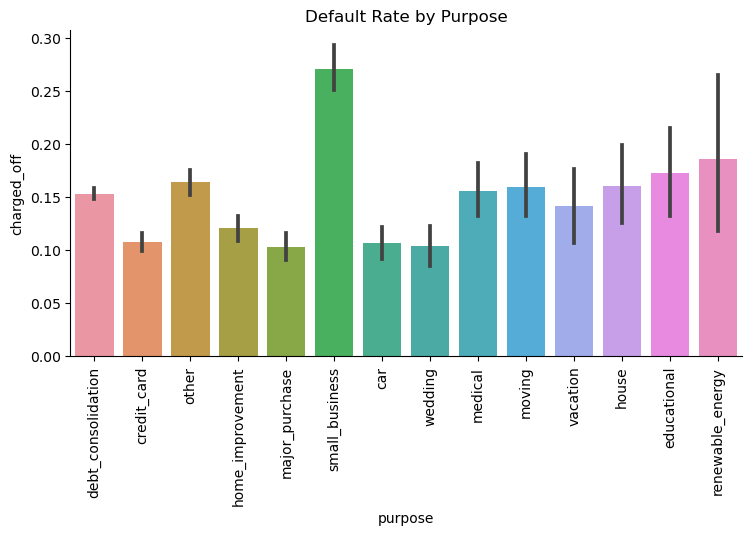

In [430]:
purposeorder = list(df.purpose.value_counts().keys())
g = sns.catplot(data=df,x='purpose',y='charged_off',kind='bar',height=4,aspect=2,order=purposeorder)
g.set(title='Default Rate by Purpose')
plt.xticks(rotation=90)
plt.show()

### Employment length does not have any relationship with default rates

In [431]:
df.emp_length.unique()

emp_length_order=['< 1 year', '1 year','2 years','3 years', '4 years','5 years',  
                  '6 years',  '7 years','8 years', '9 years' ,'10+ years']

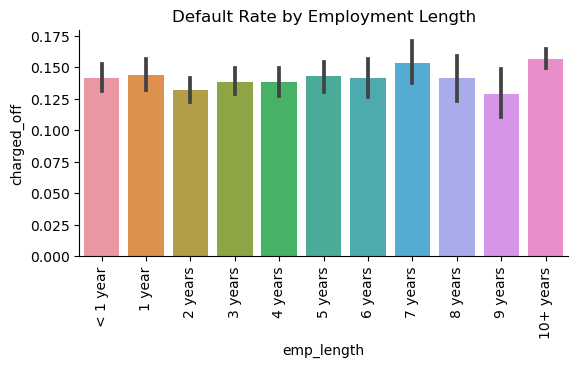

In [434]:
g = sns.catplot(data=df,x='emp_length',y='charged_off',kind='bar',height=3,aspect=2,order=emp_length_order)
g.set(title='Default Rate by Employment Length')
plt.xticks(rotation=90)
plt.show()

In [435]:
def emp_len_bucket(x):
    if x in ['< 1 year', '1 year']:
        return '<=1 year'
    elif x in ['2 years','3 years', '4 years','5 years']:
        return '2-5 years'
    elif x in ['6 years',  '7 years','8 years', '9 years']:
        return '6-9 years'
    elif x=='10+ years':
        return '10+ years'
    else:
        return 'Unknown'

In [436]:
df['emp_len_bucket'] = df.emp_length.apply(emp_len_bucket)

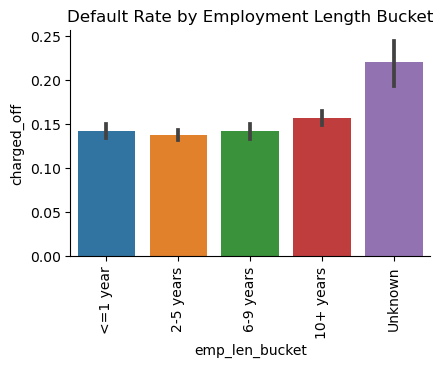

In [437]:
g = sns.catplot(data=df,x='emp_len_bucket',y='charged_off',kind='bar',height=3,aspect=1.5,order=['<=1 year','2-5 years','6-9 years','10+ years','Unknown'])
g.set(title='Default Rate by Employment Length Bucket')
plt.xticks(rotation=90)
plt.show()

In [438]:
def cont_plot(col):
    f, axes = plt.subplots(1, 2)
    sns.kdeplot(data=df, x=col,hue='loan_status',common_norm=False, ax=axes[0])
    sns.boxplot(data=df,x='loan_status',y=col,ax=axes[1])
    f.tight_layout()
    plt.show()

### Interest rate and Debt-to-income ratio seem to be a strong predictor of default rates
### loan amount, installment amount are weak predictors
### Annual income has little to no relationship with default rates

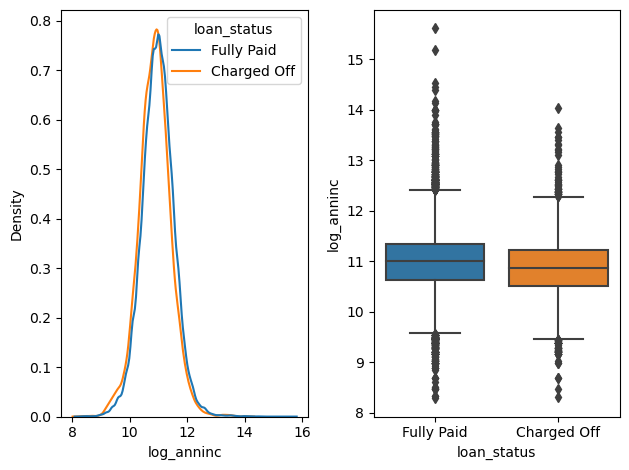

In [439]:
cont_plot('log_anninc')

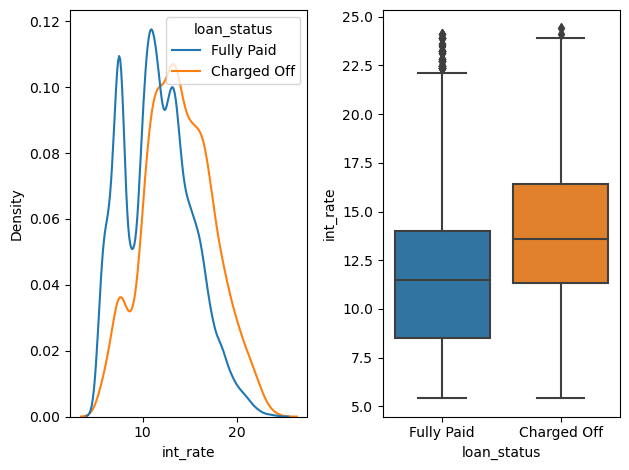

In [440]:
cont_plot('int_rate')

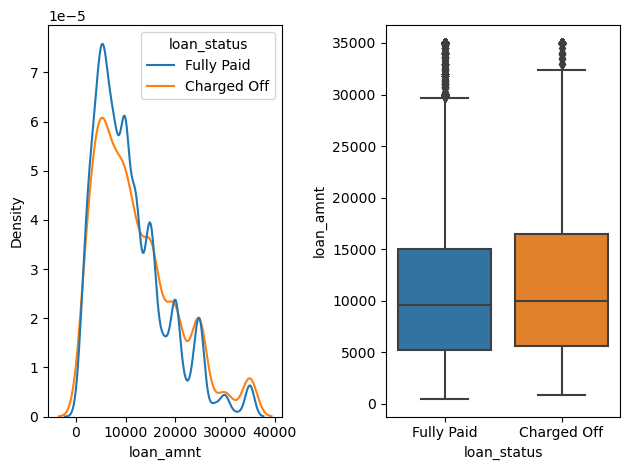

In [441]:
cont_plot('loan_amnt')

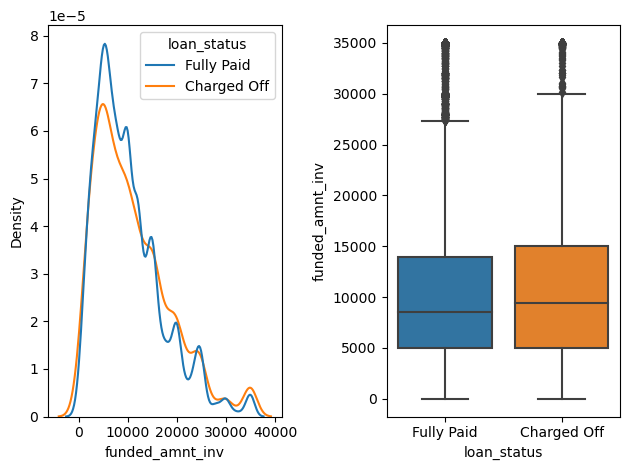

In [442]:
cont_plot('funded_amnt_inv')

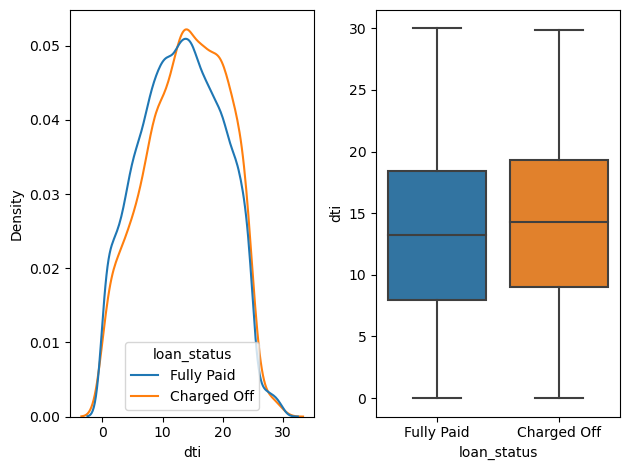

In [443]:
cont_plot('dti')

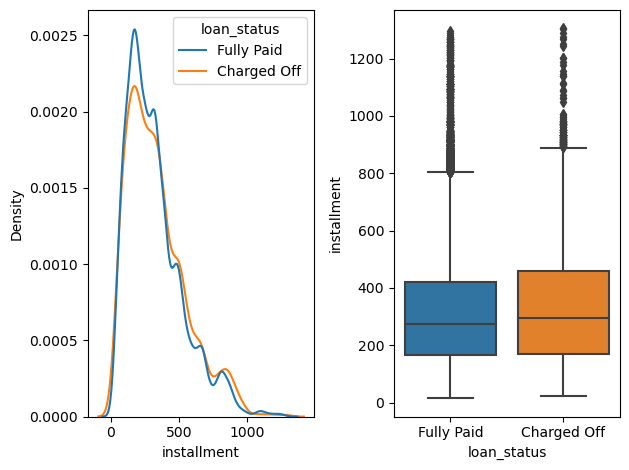

In [444]:
cont_plot('installment')

# Unsurprisingly, loan and imstallment amounts are all highly correlated
#### It makes sense to analyse loan amount going forward, as installments as well as funded amount will have a similar relationship with default rate
####  We have also already captured the effect of funding ratio in a separate variable

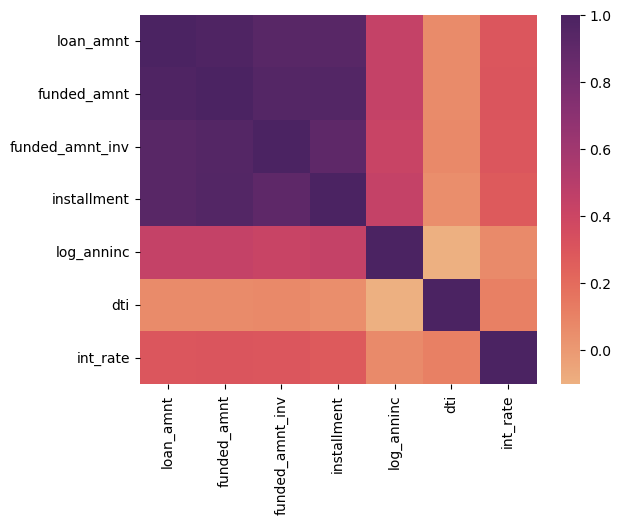

In [445]:
correlations = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment','log_anninc','dti','int_rate']].corr()

sns.heatmap(correlations,cmap='flare')
plt.show()

## We can bucket the numerical variables into High/Medium/Low to give specific recommendations
### In case of a modelling exercise we could have directly used the numerical column as a predictor

In [446]:
df[['loan_amnt','int_rate','dti']].describe(percentiles=percentiles)

,loan_amnt,int_rate,dti
count,38577.000000,38577.000000,38577.000000
mean,11047.025430,11.932219,13.272727
std,7348.441646,3.691327,6.673044
min,500.000000,5.420000,0.000000
1%,1200.000000,5.420000,0.350000
5%,2400.000000,6.170000,2.100000
10%,3090.000000,7.140000,4.060000
20%,5000.000000,7.900000,6.910000
30%,6000.000000,9.990000,9.240000
40%,7750.000000,10.990000,11.350000


In [447]:
df['loan_amnt_bucket'] = pd.cut(df['loan_amnt'], bins=[0, 10000, 20000, 25000 ,float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

df['int_rate_bucket'] = pd.cut(df['int_rate'], bins=[0, 10, 15, 20 ,float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

df['dti_bucket'] = pd.cut(df['dti'], bins=[0, 10, 16, 22 ,float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])


### Larger loan amounts seem to have higher default rates
### This seems incidental, as when we control for term and loan grade we see no clear relationship

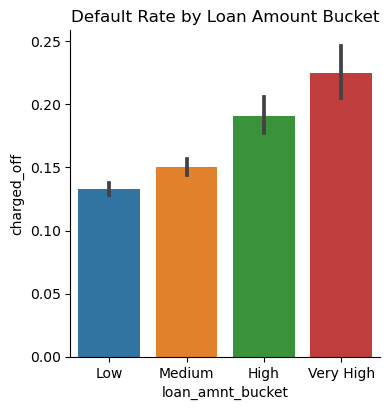

In [448]:
g = sns.catplot(data=df,x='loan_amnt_bucket',y='charged_off',kind='bar',height=4,aspect=1)
g.set(title='Default Rate by Loan Amount Bucket')
plt.show()

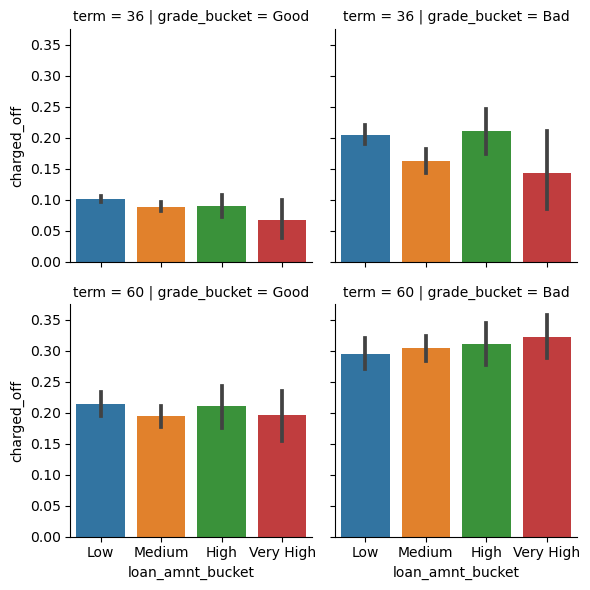

In [449]:
# Controlling for our strongest predictors, we see no clear relationship except in the term=60 | Bad grade bucket

g = sns.catplot(data=df,x='loan_amnt_bucket',y='charged_off',kind='bar',row='term',col='grade_bucket',height=3,aspect=1)
plt.show()


### With interest rates we see a very clear relationship, where higher interest rates have higher default rates even when controlling for strong predictors

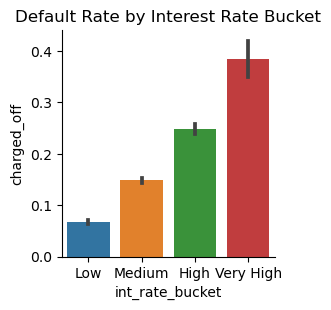

In [450]:
g = sns.catplot(data=df,x='int_rate_bucket',y='charged_off',kind='bar',height=3,aspect=1)
g.set(title='Default Rate by Interest Rate Bucket')
g.savefig('ir.png')
plt.show()

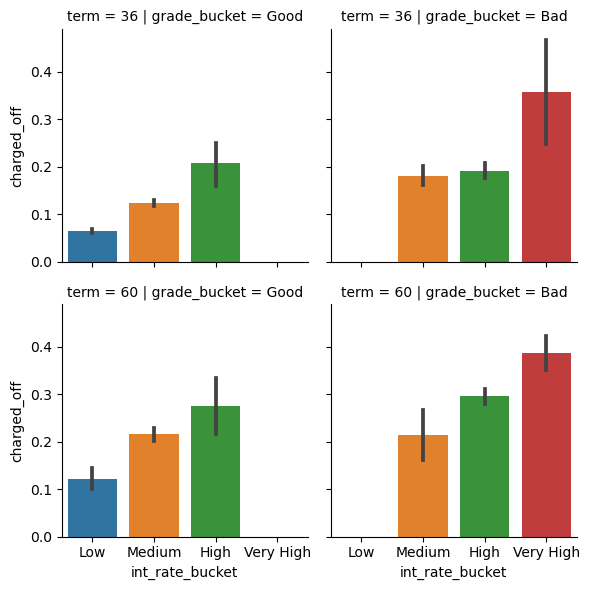

In [451]:
# 
g = sns.catplot(data=df,x='int_rate_bucket',y='charged_off',kind='bar',row='term',col='grade_bucket',height=3,aspect=1)
g.savefig('ir_facet.png')
plt.show()

### Debt to Income ratio also does not have any clear effect on default rates when controlling for term and loan grade

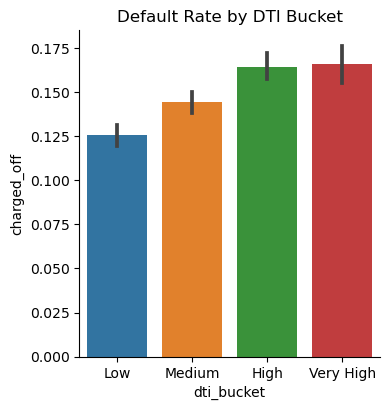

In [452]:
g = sns.catplot(data=df,x='dti_bucket',y='charged_off',kind='bar',height=4,aspect=1)
g.set(title='Default Rate by DTI Bucket')
plt.show()

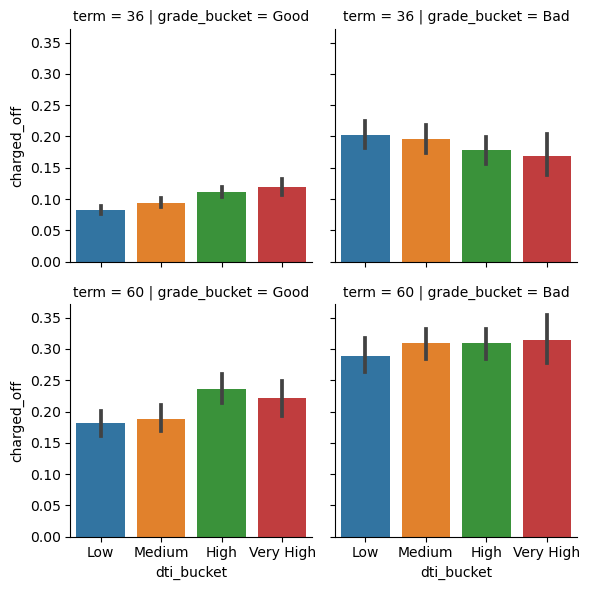

In [453]:
g = sns.catplot(data=df,x='dti_bucket',y='charged_off',kind='bar',row='term',col='grade_bucket',height=3,aspect=1)
plt.show()

### The following variables proved useful predictors of default
1. Loan Grade
2. Loan Term
3. Ratio of Funded (by investors) to Requested Loan Amount
4. Interest Rate
5. Having public record bankruptcies

Let's calculate some stats that will be useful in making recommandations in our presentation
* precision - total defaults in a group / total loans in the group
* recall - total defaults in a group / total defaults in the population
* perc_total (% total) - total loans in a group / total loans in the population

In [454]:
final_cols = [ 'term', 'int_rate_bucket','low_funding_ratio', 'grade_bucket', 'has_pub_rec_bankruptcies']

In [455]:
def agg_stats(col,df=df):
    return df.groupby(col).charged_off.agg(['count','sum',('precision',lambda x: x.sum()/x.count()),('recall', lambda x: x.sum()/df.charged_off.sum()),('perc_total',lambda x: x.count()/len(df))])
                                            
                                            

In [456]:
agg_stats('grade_bucket')

,count,sum,precision,recall,perc_total
grade_bucket,,,,,
Bad,9023,2253,0.249695,0.400391,0.233896
Good,29554,3374,0.114164,0.599609,0.766104


In [457]:
agg_stats('term')

,count,sum,precision,recall,perc_total
term,,,,,
36,29096,3227,0.110909,0.573485,0.754232
60,9481,2400,0.253138,0.426515,0.245768


In [458]:
agg_stats('int_rate_bucket')

,count,sum,precision,recall,perc_total
int_rate_bucket,,,,,
Low,12316,830,0.067392,0.147503,0.319258
Medium,18265,2707,0.148207,0.481073,0.473469
High,7226,1794,0.248270,0.318820,0.187314
Very High,770,296,0.384416,0.052604,0.019960


In [460]:
(1794+296)/(7226+770) ## overall precision of high & v. high interest rate loans

0.2613806903451726

In [461]:
agg_stats('has_pub_rec_bankruptcies')

,count,sum,precision,recall,perc_total
has_pub_rec_bankruptcies,,,,,
0,36935,5259,0.142385,0.934601,0.957436
1,1642,368,0.224117,0.065399,0.042564


In [462]:
agg_stats('low_funding_ratio')

,count,sum,precision,recall,perc_total
low_funding_ratio,,,,,
0,34795,4913,0.141198,0.873112,0.901962
1,3782,714,0.188789,0.126888,0.098038


In [463]:
df['risk_score'] = (df.grade_bucket=='Bad').astype(int) + (df.term==60).astype(int) + df.int_rate_bucket.isin(['High','Very High']) + df.low_funding_ratio + df.has_pub_rec_bankruptcies




In [464]:
agg_stats('risk_score')

,count,sum,precision,recall,perc_total
risk_score,,,,,
0,21340,1905,0.089269,0.338546,0.553179
1,8132,1385,0.170315,0.246135,0.210799
2,4259,847,0.198873,0.150524,0.110403
3,4149,1232,0.296939,0.218944,0.107551
4,658,240,0.364742,0.042652,0.017057
5,39,18,0.461538,0.003199,0.001011
